<a href="https://colab.research.google.com/github/martinmaturana777/AED-Apuntes/blob/main/Pauta_Auxiliar_2_2025_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pauta Auxiliar 2: Recursión y Diagramas de Estado

**Auxiliares: Valentina Alarcón Yañez, Antonia G. Calvo, Cristián Llull, Raimundo Lorca Correa, Samuel Chavéz Fierro<br>
Profesores: Nelson Baloian, Iván Sipirán, Patricio Poblete<br>
Curso: CC3001 Algoritmos y Estructuras de Datos**



# Pregunta 1: Contando ocurrencias

El DCC estaba a punto de finalizar uno de los problemas del milenio, pero justo cuando estaban por contar ocurrencias en una lista de largo `n` ¡Se nos rompieron todos los ciclos! y ya no tenemos acceso a `for, while, do while` (¡Ni a ChatGPT!)

Por eso el departamento llama a la nueva estrella de programación (¡Usted!) que los rumores dicen que aprendió una técnica oscura y le piden si puede encontrar una forma alterna de solucionar este dilema.

+ Plantee el problema de forma usual, con ciclos y concluya que puede ser resuelto de forma recursiva
+ Encuentre el caso base
+ Programe la función `contarOcurrencias(array, elemento)`

a) Plantear con ciclos:

In [ ]:
def contar_ocurrencias_ciclos(array, elem):
  elementos = 0 # Se tiene un contador
  for num in array:
    if num == elem:
      elementos += 1

b) Caso base:

Es el caso de la recursividad que se puede resolver inmediatamente.

Una buena forma de pensar el caso base es que es el caso más simple que puede darse. En este caso, podría ocurrir que a la función se le entregue un array sin elementos, y por defecto la respuesta sería 0.

El caso base también es el escenario al que siempre se llega para finalizar la recursión.

c) Programar con recursión:

In [ ]:
import numpy as np

In [ ]:
def contar_ocurrencias(array, elem):
    if len(array) == 0: # Se llegó al final, CASO BASE
        return 0
    if array[0] == elem: # Se encontró una instancia más del elemento
      return 1 + contar_ocurrencias(array[1:], elem)
    else:
      return contar_ocurrencias(array[1:], elem)

print(contar_ocurrencias(np.array([1, 2, 3, 2, 4, 2, 5]), 2))

3


# Pregunta 2: Triángulo de Pascal

En cuanto usted terminó de contar recurrencias, resulta que el DIM también estaba a punto de finalizar otro problema del milenio, y justamente cuando lo que les faltaba era armar un triángulo de Pascal, también perdieron nuevamente los ciclos

El DIM escuchando los rumores del DCC, se entera de la nueva estrella que puede resolver problemas iterativos con esta técnica que llamó 'recursión'

```
       1
      1 1
     1 2 1
    1 3 3 1
   1 4 6 4 1
  1 5 10 10 5 1
```

Triángulo de Pascal de referencia

Una propiedad interesante del triángulo de Pascal es que en la $i$-ésima fila (contando desde 0), la $j$-ésima posición (nuevamente contando desde 0) contiene el valor del binomial $binom(i, j)$

La idea del ejercicio es usar como caso recursivo lo siguiente:
\begin{equation*}
\binom{n}{k} = \binom{n-1}{k-1} + \binom{n−1}{k}
\end{equation*}

+ Plantee el problema de forma usual, con ciclos y vea los paralelismos de como puede ser recursivo
+ Encuentre el caso base
+ Programe la función `trianguloPascal(n)` que imprime los primeros $n$ niveles del triángulo de Pascal

a) Caso con ciclos

La forma iterativa consideraría usar la fórmula directa de una combinatoria, la cual se ve en la siguiente imagen:

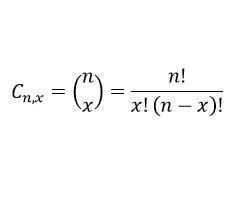

In [ ]:
# Para ello, primero se hará una función auxiliar que calcule una combinatoria.
# Se asumirá que n >= k

def comb(n, k):
  # Primero se calculará la parte del n!/k!                (== (k + 1)*(k + 2)*(...)*n)
  acc = 1 # Acumulador que representa el resultado parcial de n!/k!
  i = k + 1  # Factor
  while i <= n: # Hasta que i == n
    acc *= i
    i += 1

  # Luego se calculará (n - k)!                            (== 1 (2) (3) ... (n - k) para obtener (n - k)!)
  acc2 = 1 # Resultado parcial de (n - k)!
  i = 1
  while i <= (n - k): # Hasta que i == (n - k)
    acc2 *= i
    i +=1

  return acc//acc2 # retornamos n!/(k!(n - k)!)

# Luego, una función general arma el triángulo

def trianguloPascal(n): # Imprime los niveles 0 a n del triángulo de Pascal
  # La idea acá es utilizar directamente la forma cerrada P[i][j] = C(i, j)
  for i in range(n+1):
    lst = [] # Vamos a agregar los resultados a una lista vacía
    for j in range(i+1):
      lst.append(str(comb(i, j))) # Agregamos (i j) a la lista
    print(" ".join(lst)) # Imprimimos la lista con un espacio entre cada par de elementos

In [ ]:
trianguloPascal(10)

1
1 1
1 2 1
1 3 3 1
1 4 6 4 1
1 5 10 10 5 1
1 6 15 20 15 6 1
1 7 21 35 35 21 7 1
1 8 28 56 70 56 28 8 1
1 9 36 84 126 126 84 36 9 1
1 10 45 120 210 252 210 120 45 10 1


b) Caso base

El caso más simple que puede ocurrir con un Triángulo de Pascal es con n = 0, es decir, tener un solo nivel.

Por otro lado, para la regla de Pascal, se tiene el caso base:

$ \binom{n}{n} $ = $ \binom{n}{0} $ = 1

Que es análogo a decir que "las esquinas del triángulo de Pascal son 1's"

c) Programar con recursión

In [ ]:
# Para poder

def trianguloPascal_rec(n): # Retorna los niveles 0 a n del triángulo de Pascal
  if n == 0: # Un caso base, en n = 0, el triángulo tiene un único nivel, el que contiene únicamente un 1
    return [[1]]
  else:
    triangulo_anterior = trianguloPascal_rec(n-1) # Resultado de triángulo de pascal obtenido hasta nivel anterior (lista de listas)
    nivel_anterior = triangulo_anterior[n-1] # La lista que refiere al nivel anterior
    nivel_actual = [] # Lista donde se agregarán los valores del nivel actual

    # Calcula el nivel actual
    for i in range(n+1): # El nivel n tiene n+1 elementos
      if i == 0 or i == n: # Caso base de la regla de Pascal: C(n, 0) = C(n, n) = 1
        nivel_actual.append(1)
      else: # Aplicamos el caso recursivo de la regla de Pascal: C(n, i) = C((n-1), (i-1)) + C((n-1), i)
        nivel_actual.append(nivel_anterior[i-1] + nivel_anterior[i])

    retorno = triangulo_anterior
    retorno.append(nivel_actual) # Al triángulo anterior se le agrega el nuevo nivel

    return retorno

trianguloPascal_rec(10)
# notemos que trianguloPascal_rec(n)[n][k] es el valor de C(n, k)

[[1],
 [1, 1],
 [1, 2, 1],
 [1, 3, 3, 1],
 [1, 4, 6, 4, 1],
 [1, 5, 10, 10, 5, 1],
 [1, 6, 15, 20, 15, 6, 1],
 [1, 7, 21, 35, 35, 21, 7, 1],
 [1, 8, 28, 56, 70, 56, 28, 8, 1],
 [1, 9, 36, 84, 126, 126, 84, 36, 9, 1],
 [1, 10, 45, 120, 210, 252, 210, 120, 45, 10, 1]]

# Pregunta 3: ¿Se acuerdan de Pokemon?

Primero un recuerdo de diagramas. Los diagramas de estado son aquellos que detallan el comportamiento del sistema de una manera gráfica, considerando nodos 'estado', las distintas transiciones que existen entre ellos, y que se llega a un 'estado final'. Se debe reflejar como el sistema reacciona ante los distintos eventos que pueden ocurrir.

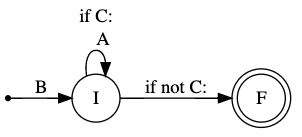

En este diagrama:
* Los estados (círculos) representan el estado del proceso en ese momento, descrito por la afirmación lógica correspondiente. En un ciclo, esa afirmación lógica es lo que hemos llamado invariante.
* Un doble círculo representa a un estado final.
* Las flechas pueden llevar como rótulo un "if" con una condición, que debe cumplirse para que se siga esa flecha, y también pueden estar rotuladas con una instrucción (o un bloque de instrucciones), que se ejecuta al hacer esa transición.

En el auxiliar 0, tuvimos la dicha de ser un entrenador Pokémon. Sin embargo, si alguno conoce el juego, no se tiene la experiencia completa si no aparecen ¡enemigos!


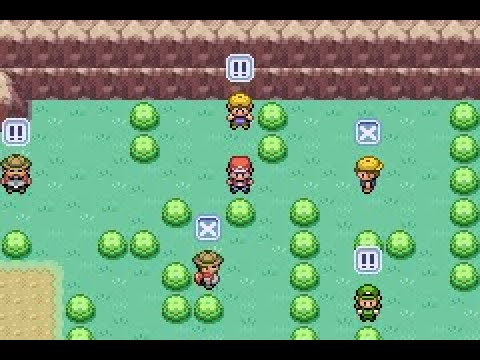

  Ahora vamos a modelar a este enemigo con diagramas de estado.



+ Modelamiento de la batalla
    Modele una batalla entre el enemigo y el entrenador Pokémon. _Recordatorio: en una batalla, los Pokémon se atacan entre sí. Si se le acaba el HP, sigue batallando el siguiente Pokémon del entrenador. La batalla acaba cuando uno de los entrenadores se queda sin Pokémon._

    Defina estados y eventos y plantee el diagrama de estados.
  

+ Modelando el comportamiento NPC

    Modele el comportamiento NPC del enemigo. _Recordatorio: un enemigo llama a duelo a un entrenador Pokémon cuando se le cruza por enfrente. El entrenador no puede rechazar el desafío._

    Defina estados y eventos y plantee el diagrama de estados.

Para la primera parte tenemos el siguiente diagrama. Este es de la perspectiva de uno de los entrenadores.

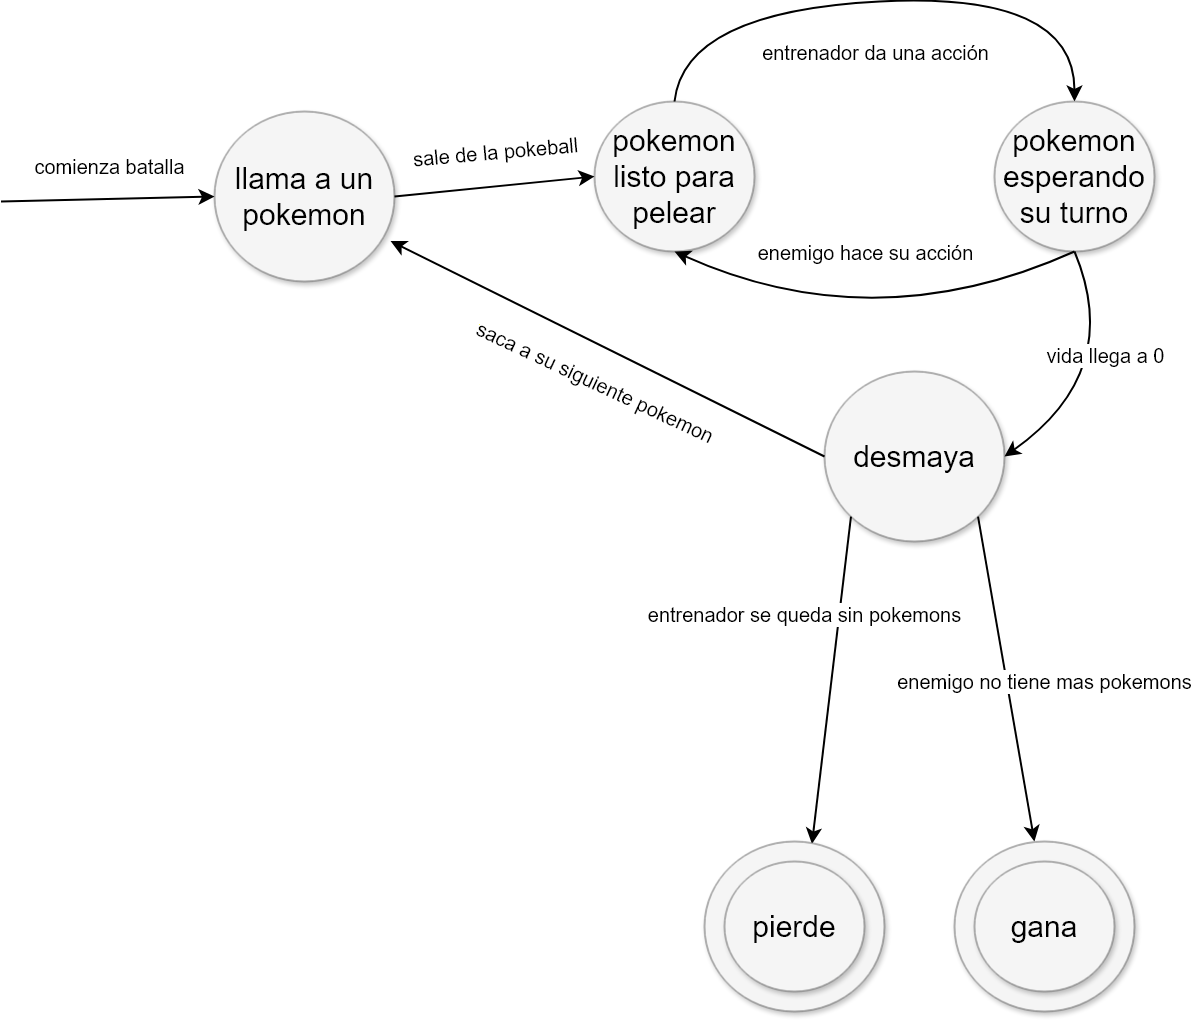

Para la segunda parte podemos modelar la interacción con el NPC.


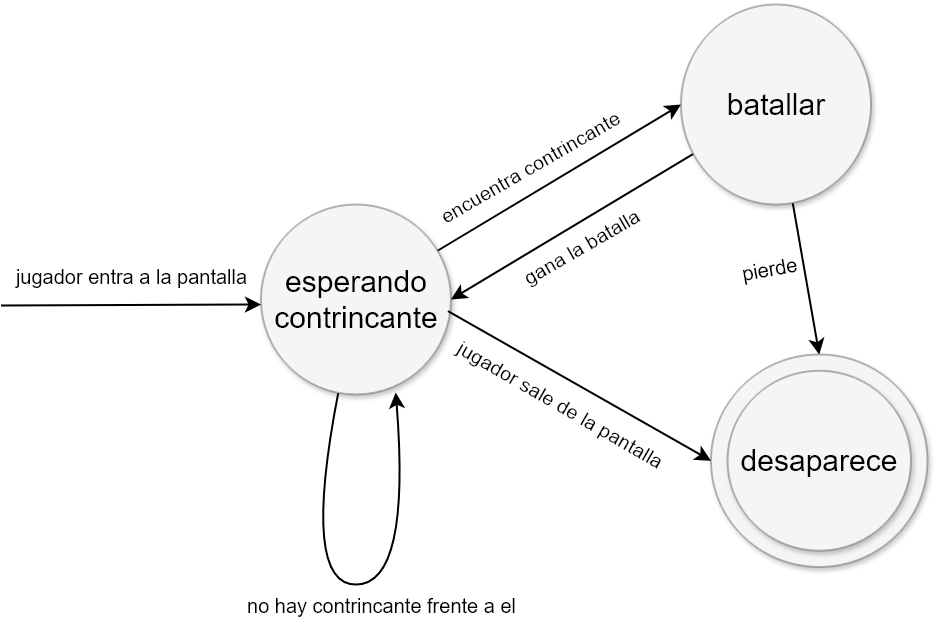

# Pregunta 4: Descomposición en factores primos (Propuesto)

Luego de un agotador día de maquinar problemas del milenio, usted decide relajarse, y se entera que los ciclos no solo se rompieron en la FCFM, ni en el país, sino que ¡Se rompieron de forma global!.

Google quienes estaban reparando la caída de iteraciones mundial, se encontró con un gran problema y necesita por \$1T USD encontrar una forma de la factorización prima de un numero sin iteraciones que nos devuelva finalmente la iteración al mundo

  $$ 2 * 2 * 3 * 5 * 7 = 420 $$
(Factorización prima de ejemplo)

a) Encuentre los casos base.

¿Qué pasa cuando intentamos encontrar los factores primos de un número primo? En este caso, simplemente retornamos una lista que contiene únicamente al número en sí.

Computacionalmente, esto es difícil, por lo que utilizaremos otra técnica para descartar números primos.

b) Programe la función recursiva `factoresPrimos(i, n)` que retorna una lista con todos los factores primos de $n$ que son mayores que $i$.

Primero, notemos que la presencia de $i$ nos permite tener una forma más sencilla de determinar si un número es primo: si ya revisamos todos los $j < i$, entonces cuando $i \geq \frac{n}{2}$ podemos decir que no quedan factores por revisar. Esto corresponde a otro caso base particular para nuestra función.

Ahora notemos que si ya revisamos todos los $0 < j < i$, entonces si $i$ no es primo no puede ser factor de $n$ _(¿por qué?)_

In [ ]:
def factoresPrimos(i, n): # retorna una lista con los factores primos de n mayores que i
  if i >= n/2:
    return [n] # caso base: retornamos la lista que sólo contiene a n
  elif i <= 1:
    return factoresPrimos(2, n) # no hay ningún primo menor que 2, ¿qué pasaría si colocásemos un 1 en su lugar?
  else:
    if n % i == 0:
      return [i] + factoresPrimos(i, n//i) # ¿por qué revisamos i de nuevo?
    else:
      return factoresPrimos(i+1, n) # ¿por qué dejamos de revisar i?

In [ ]:
assert factoresPrimos(1, 100) == [2, 2, 5, 5]
assert factoresPrimos(1, 147) == [3, 7, 7]
assert factoresPrimos(1, 142) == [2, 71]
assert factoresPrimos(1, 67) == [67]
assert factoresPrimos(1, 243) == [3, 3, 3, 3, 3]